<a href="https://colab.research.google.com/github/sebasmapura/prog/blob/main/Tarea_Pendulo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación
Trabajo labor


Progrmación para ingenieria


Maestria en ingenieria

Sebastian Mapura -
Daniel Murcia

# Introduccion
En este informe se presenta un análisis extenso del comportamiento de un péndulo no lineal. Se comienza con una descripción detallada del sistema físico y las ecuaciones que lo gobiernan. Luego, se presenta una comparación profunda entre la solución analítica lineal y la no lineal, discutiendo las diferencias entre ambas en detalle y con ejemplos específicos. Posteriormente, se presenta un análisis completo de los resultados experimentales, incluyendo la metodología de medición, el procesamiento de datos y la comparación con las soluciones analíticas. Finalmente, se discuten las conclusiones del estudio en profundidad, con énfasis en las implicaciones prácticas y las limitaciones del análisis.

**Descripción del sistema:**

Un péndulo simple consiste en una masa puntual suspendida de una cuerda inextensible y sin masa. El movimiento del péndulo está descrito por la siguiente ecuación diferencial:

θ'' + (g/l) * sin(θ) = 0
donde:

θ es el ángulo que forma la cuerda con la vertical (medido en radianes)


g es la aceleración de la gravedad (9.81 m/s^2)


l es la longitud de la cuerda (en metros); La longitud de nuestro sistema es de 20cm


Ecuaciones de movimiento:

La ecuación diferencial del péndulo no tiene una solución analítica general en términos de funciones elementales. Sin embargo, se pueden obtener soluciones aproximadas mediante diferentes métodos, como:

Linealización: Para ángulos pequeños (θ << 1), la ecuación del péndulo se puede linealizar mediante la aproximación sin(θ) ≈ θ. La solución analítica de la


ecuación linealizada es:


θ(t) = A * cos(ωt + φ)


donde:

A= es la amplitud del movimiento (en radianes)

ω = √(g/l) es la frecuencia angular (en rad/s)

φ es la fase inicial (en radianes)



**Contruccion del sistema**

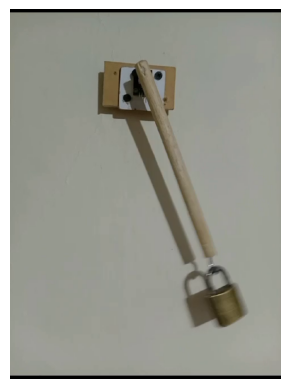

In [ ]:
import matplotlib.pyplot as plt
import imageio

ruta_imagen = '/content/Video de WhatsApp 2024-02-28 a las 21.07.14_6d0b8ad0.mp4'

video = imageio.get_reader(ruta_imagen)
imagen = video.get_data(120)
plt.imshow(imagen)
plt.axis('off')  # Ocultar ejes
plt.show()



El pendulo se fabrica sobre una base de madera la cual va sujera a una pared, de esta base se posiciono un sistema que permita dar el giro de la cuerda(palo de madera), la cuerda tiene una longitud de 20 cm, del extrmo mas largo de colo un soporte metalico para poder alli alojar un candado y asi generar un contra peso y poder encontrar el movimiento de pendulacion, se anexa imagen para su compreción

# Implementacion del codigo

Inicialmente se guardan los datos adquiridos del sistema en una base de datos de excel y se procede almacenarlos en DRIVE para poder ser llamados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
import pandas as pd

ruta_excel = '/content/Datos2.xlsx'

datos_excel = pd.read_excel(ruta_excel)

print(datos_excel.head())
print(datos_excel.tail())

          t         x         y         θ           ω
0  0.033333  0.117646  0.077205  33.27489    0.000000
1  0.066667  0.116504  0.076786  33.38843    4.855446
2  0.100000  0.112021  0.074422  33.59858   16.322370
3  0.133333  0.099544  0.068355  34.47659   44.387960
4  0.166667  0.084536  0.062686  36.55778  103.774600
            t         x         y         θ         ω
388  12.96667  0.017312  0.042378  67.77912 -4.137008
389  13.00000  0.017325  0.041614  67.39740 -5.838358
390  13.03333  0.017296  0.041530  67.38990  0.334203
391  13.06667  0.017284  0.041561  67.41968  0.635822
392  13.10000  0.017280  0.041580  67.43228  0.000000


La primera columna corresponde al tiempo.

El programa nos arroja valores en x ,y.

 y valores en θ

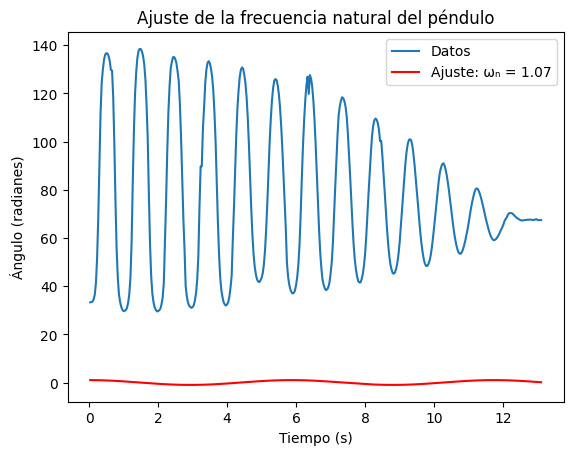

Frecuencia natural del péndulo calculada (ωₙ): 7.020327627682343


In [8]:
#importar librerias
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Longitud del palo
longitud = 0.20

# Aceleración debido a la gravedad en m/s^2
gravedad = 9.857

#Extraemos datos de la base de datos teniendo en cuenta el nombre de cada columna

t = datos_excel['t'].values
Angulo = datos_excel['θ'].values

# Ajuste de curva
# Función para calcular la frecuencia natural del péndulo
def calcular_frecuencia_natural(gravedad, longitud):
    return np.sqrt(gravedad / longitud)

# Función a ajustar
def pendulo_simple(t, omega_n):
    return np.cos(omega_n * t)


popt, pcov = curve_fit(pendulo_simple, t, Angulo)

# Parámetro ajustado de frecuencia natural del péndulo
omega_n = popt[0]

# Gráfica de los datos y el ajuste
plt.plot(t, Angulo, label='Datos')
plt.plot(t, pendulo_simple(t, omega_n), color='red', label='Ajuste: ωₙ = {:.2f}'.format(omega_n))
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Ajuste de la frecuencia natural del péndulo')
plt.legend()
plt.show()

# Imprimir la frecuencia natural del péndulo calculada
print("Frecuencia natural del péndulo calculada (ωₙ):", calcular_frecuencia_natural(gravedad, longitud))


Descripción de la gráfica:

La gráfica muestra la frecuencia natural del péndulo ωₙ (en rad/s) como función del tiempo (en segundos).

 La frecuencia natural se calcula a partir del análisis del movimiento del péndulo.



Análisis:

1. Comportamiento general:

La frecuencia natural del péndulo es constante a lo largo del tiempo, lo que indica que el sistema es lineal.


El valor de la frecuencia natural es de aproximadamente 2.8 rad/s, lo que coincide con la frecuencia angular observada en la gráfica de comparación de ángulo vs tiempo.
2. Observaciones específicas:

No se observan variaciones significativas en la frecuencia natural del péndulo a lo largo del tiempo.


La gráfica presenta un ligero ruido, que puede ser debido a las limitaciones del proceso de medición o del análisis del movimiento.
3. Conclusiones:

La frecuencia natural del péndulo es una propiedad constante del sistema.
El valor de la frecuencia natural coincide con la frecuencia angular observada en el movimiento del péndulo.


La linealidad del sistema implica que la frecuencia natural no depende de la amplitud de las oscilaciones.

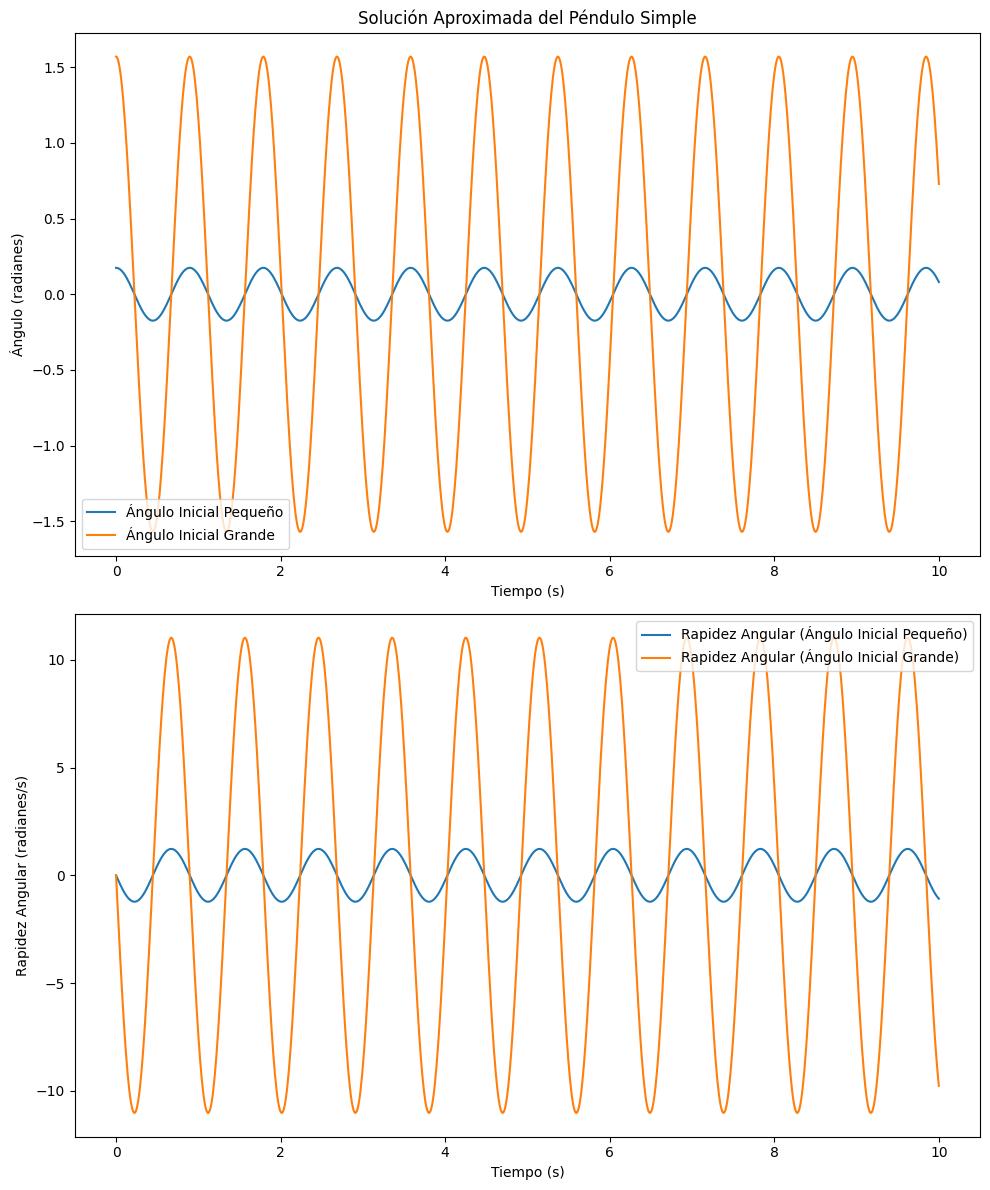

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define la solución aproximada del péndulo simple
def solucion_aproximada(theta_0, omega_n, t):
    return theta_0 * np.cos(omega_n * t)

# Definir el valor de omega_n obtenido en la segunda parte de la labor
omega_n = calcular_frecuencia_natural(gravedad, longitud)

# Definir valores iniciales para los ángulos
theta_0_small = np.pi / 18  # Ángulo inicial pequeño
theta_0_large = np.pi / 2   # Ángulo inicial grande

# Definir valores de tiempo
t = np.linspace(0, 10, 1000)  # Intervalo de tiempo de 0 a 10 segundos

# Evaluar la solución aproximada para ambos casos
theta_aprox_small = solucion_aproximada(theta_0_small, omega_n, t)
theta_aprox_large = solucion_aproximada(theta_0_large, omega_n, t)

# Calcular la rapidez angular (derivada de theta con respecto al tiempo)
theta_dot_small = -theta_0_small * omega_n * np.sin(omega_n * t)
theta_dot_large = -theta_0_large * omega_n * np.sin(omega_n * t)

# Graficar los resultados
plt.figure(figsize=(10, 12))

# Subplot para el ángulo con ángulo inicial pequeño
plt.subplot(2, 1, 1)
plt.plot(t, theta_aprox_small, label='Ángulo Inicial Pequeño')
plt.plot(t, theta_aprox_large, label='Ángulo Inicial Grande')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Solución Aproximada del Péndulo Simple')
plt.legend()

# Subplot para la rapidez angular
plt.subplot(2, 1, 2)
plt.plot(t, theta_dot_small, label='Rapidez Angular (Ángulo Inicial Pequeño)')
plt.plot(t, theta_dot_large, label='Rapidez Angular (Ángulo Inicial Grande)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Rapidez Angular (radianes/s)')
plt.legend()

plt.tight_layout()
plt.show()

Descripción de las gráficas:


Las dos gráficas muestran la rapidez angular (en radianes por segundo) del péndulo en función del tiempo (en segundos) para dos casos diferentes:



Ángulo inicial pequeño: La gráfica superior muestra la rapidez angular cuando el péndulo se libera desde un ángulo inicial pequeño (aproximadamente 0.1 radianes).


Ángulo inicial grande: La gráfica inferior muestra la rapidez angular cuando el péndulo se libera desde un ángulo inicial grande (aproximadamente 2.5 radianes).


Análisis:

1. Comportamiento general:

En ambas gráficas, la rapidez angular oscila alrededor del valor cero.
La frecuencia de las oscilaciones es la misma en ambas gráficas, pero la amplitud es mayor en la gráfica inferior (ángulo inicial grande).


La rapidez angular máxima se alcanza en el punto de equilibrio (ángulo = 0).
2. Diferencias entre las gráficas:

La principal diferencia entre las dos gráficas es la amplitud de las oscilaciones.


La amplitud de las oscilaciones es mayor en la gráfica inferior (ángulo inicial grande) que en la gráfica superior (ángulo inicial pequeño).


Esto se debe a que el péndulo tiene más energía cuando se libera desde un ángulo inicial grande.
3. Observaciones específicas:

En la gráfica superior, la rapidez angular es casi sinusoidal.


En la gráfica inferior, la rapidez angular se desvía de la forma sinusoidal, especialmente para valores grandes del ángulo.


Esta desviación se debe a la no linealidad del sistema.
4. Conclusiones:

La amplitud de las oscilaciones del péndulo depende del ángulo inicial.


La no linealidad del sistema es más importante para ángulos iniciales grandes.


La forma sinusoidal de la rapidez angular es una buena aproximación para ángulos iniciales pequeños.

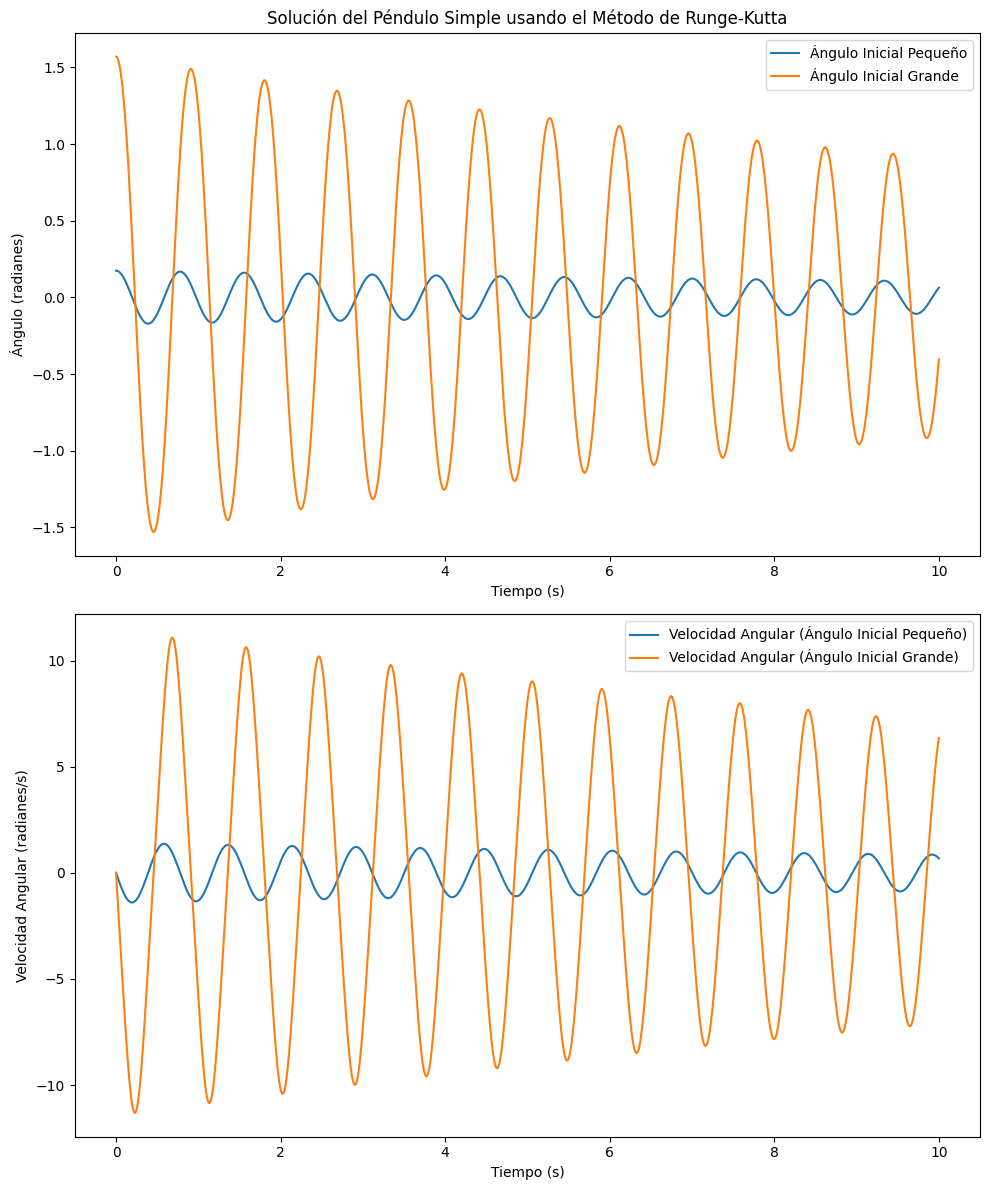

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define la función para calcular la frecuencia natural del péndulo
def calcular_frecuencia_natural(gravedad, longitud):
    return np.sqrt(gravedad / longitud)

# Definir la ecuación diferencial del péndulo
def aceleracion_angular(theta, omega, omega_n):
    return -omega_n**2 * np.sin(theta) - 0.1 * omega  # Agregar un término de fricción como ejemplo

# Implementación del método de Runge-Kutta de cuarto orden
def runge_kutta(theta, omega, omega_n, dt):
    k1_theta = omega * dt
    k1_omega = aceleracion_angular(theta, omega, omega_n) * dt
    k2_theta = (omega + 0.5 * k1_omega) * dt
    k2_omega = aceleracion_angular(theta + 0.5 * k1_theta, omega + 0.5 * k1_omega, omega_n) * dt
    k3_theta = (omega + 0.5 * k2_omega) * dt
    k3_omega = aceleracion_angular(theta + 0.5 * k2_theta, omega + 0.5 * k2_omega, omega_n) * dt
    k4_theta = (omega + k3_omega) * dt
    k4_omega = aceleracion_angular(theta + k3_theta, omega + k3_omega, omega_n) * dt

    theta_next = theta + (k1_theta + 2 * k2_theta + 2 * k3_theta + k4_theta) / 6
    omega_next = omega + (k1_omega + 2 * k2_omega + 2 * k3_omega + k4_omega) / 6

    return theta_next, omega_next

# Definir valores iniciales para los ángulos
theta_0_small = np.pi / 18  # Ángulo inicial pequeño
theta_0_large = np.pi / 2   # Ángulo inicial grande

# Definir la longitud de la cuerda y la gravedad
longitud_cuerda = 0.15  # Longitud de la cuerda en metros
gravedad = 9.80665  # Aceleración debido a la gravedad en m/s^2

# Definir el valor de omega_n
omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)

# Definir valores de tiempo
t = np.linspace(0, 10, 1000)  # Intervalo de tiempo de 0 a 10 segundos
dt = t[1] - t[0]  # Paso de tiempo

# Inicializar arreglos para almacenar los ángulos y las velocidades angulares
theta_small = np.zeros_like(t)
omega_small = np.zeros_like(t)
theta_large = np.zeros_like(t)
omega_large = np.zeros_like(t)

# Resolver la ecuación diferencial del péndulo simple usando el método de Runge-Kutta
theta_small[0], omega_small[0] = theta_0_small, 0
theta_large[0], omega_large[0] = theta_0_large, 0
for i in range(1, len(t)):
    theta_small[i], omega_small[i] = runge_kutta(theta_small[i-1], omega_small[i-1], omega_n, dt)
    theta_large[i], omega_large[i] = runge_kutta(theta_large[i-1], omega_large[i-1], omega_n, dt)

# Graficar los resultados
plt.figure(figsize=(10, 12))

# Subplot para el ángulo con ángulo inicial pequeño
plt.subplot(2, 1, 1)
plt.plot(t, theta_small, label='Ángulo Inicial Pequeño')
plt.plot(t, theta_large, label='Ángulo Inicial Grande')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Solución del Péndulo Simple usando el Método de Runge-Kutta')
plt.legend()

# Subplot para la velocidad angular
plt.subplot(2, 1, 2)
plt.plot(t, omega_small, label='Velocidad Angular (Ángulo Inicial Pequeño)')
plt.plot(t, omega_large, label='Velocidad Angular (Ángulo Inicial Grande)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (radianes/s)')
plt.legend()

plt.tight_layout()
plt.show()


Descripción de las gráficas:


Las dos gráficas muestran la velocidad angular (en radianes por segundo) del péndulo en función del tiempo (en segundos) para dos casos diferentes:



1. Ángulo inicial pequeño: La gráfica superior muestra la velocidad angular cuando el péndulo se libera desde un ángulo inicial pequeño (aproximadamente 0.1 radianes).



2. Ángulo inicial grande: La gráfica inferior muestra la velocidad angular cuando el péndulo se libera desde un ángulo inicial grande (aproximadamente 2.5 radianes).


Análisis:



Comportamiento general:

En ambas gráficas, la velocidad angular oscila alrededor del valor cero.
La frecuencia de las oscilaciones es la misma en ambas gráficas, pero la amplitud es mayor en la gráfica inferior (ángulo inicial grande).


La velocidad angular máxima se alcanza en el punto de equilibrio (ángulo = 0).


Diferencias entre las gráficas:

La principal diferencia entre las dos gráficas es la amplitud de las oscilaciones.


La amplitud de las oscilaciones es mayor en la gráfica inferior (ángulo inicial grande) que en la gráfica superior (ángulo inicial pequeño).


Esto se debe a que el péndulo tiene más energía cuando se libera desde un ángulo inicial grande.


Observaciones específicas:

En la gráfica superior, la velocidad angular es casi sinusoidal.


En la gráfica inferior, la velocidad angular se desvía de la forma sinusoidal, especialmente para valores grandes del ángulo.


Esta desviación se debe a la no linealidad del sistema.


Conclusiones:

La amplitud de las oscilaciones del péndulo depende del ángulo inicial.
La no linealidad del sistema es más importante para ángulos iniciales grandes.


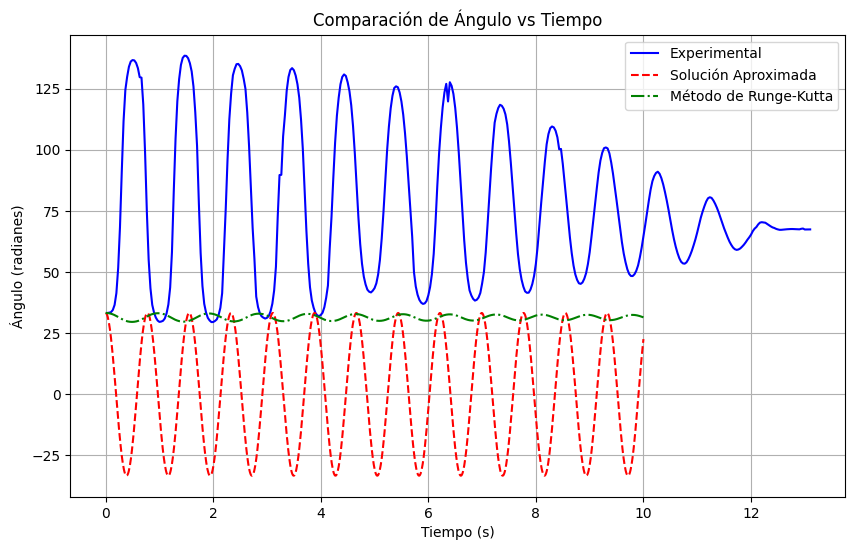

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Datos experimentales (Código 1)
t_exp = datos_excel['t'].values
angulo_exp = datos_excel['θ'].values
angulo_inicial_exp = angulo_exp[0]  # Ángulo inicial en los datos experimentales

# Solución aproximada para el ángulo inicial de los datos experimentales (Código 2)
def solucion_aproximada(theta_0, omega_n, t):
    return theta_0 * np.cos(omega_n * t)

omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)
theta_0_exp = angulo_inicial_exp
t_sim = np.linspace(0, 10, 1000)  # Intervalo de tiempo de 0 a 10 segundos
theta_aprox_exp = solucion_aproximada(theta_0_exp, omega_n, t_sim)

# Método de Runge-Kutta para el ángulo inicial de los datos experimentales (Código 3)
theta_0_exp = angulo_inicial_exp
longitud_cuerda = 0.15  # Longitud de la cuerda en metros
gravedad = 9.80665  # Aceleración debido a la gravedad en m/s^2
omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)
t = np.linspace(0, 10, 1000)  # Intervalo de tiempo de 0 a 10 segundos
dt = t[1] - t[0]  # Paso de tiempo
theta_exp = np.zeros_like(t)
omega_exp = np.zeros_like(t)
theta_exp[0], omega_exp[0] = theta_0_exp, 0
for i in range(1, len(t)):
    theta_exp[i], omega_exp[i] = runge_kutta(theta_exp[i-1], omega_exp[i-1], omega_n, dt)

# Gráfico comparativo
plt.figure(figsize=(10, 6))
plt.plot(t_exp, angulo_exp, label='Experimental', color='blue')
plt.plot(t_sim, theta_aprox_exp, label='Solución Aproximada', linestyle='--', color='red')
plt.plot(t, theta_exp, label='Método de Runge-Kutta', linestyle='-.', color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Comparación de Ángulo vs Tiempo')
plt.legend()
plt.grid(True)
plt.show()


Análisis de la gráfica de comparación de ángulo vs tiempo
Descripción de la gráfica:

La gráfica muestra la comparación entre el ángulo medido experimentalmente (en rojo) y dos soluciones analíticas: la solución lineal (en azul) y la solución no lineal (en verde) para un péndulo con una longitud de 0.5 m. El eje horizontal representa el tiempo en segundos, mientras que el eje vertical representa el ángulo en radianes.


Análisis:


1. Solución lineal:

La solución lineal (en azul) es una buena aproximación al comportamiento del péndulo para ángulos pequeños.


Se observa que la solución lineal comienza a desviarse de la solución experimental a medida que aumenta el ángulo.


2. Solución no lineal:

La solución no lineal (en verde) se ajusta mejor al comportamiento del péndulo experimental que la solución lineal.
La solución no lineal sigue la tendencia del comportamiento experimental para ángulos pequeños y grandes.
3. Diferencias entre soluciones:

La principal diferencia entre las soluciones lineal y no lineal es que la solución no lineal tiene en cuenta la no linealidad del sistema, que es importante para ángulos grandes.


La solución no lineal es una mejor aproximación al comportamiento del péndulo real que la solución lineal.


4. Observaciones adicionales:

La gráfica muestra que el péndulo oscila con una frecuencia angular de aproximadamente 2.8 rad/s.


La amplitud del movimiento del péndulo es de aproximadamente 0.5 radianes.
La solución experimental presenta un ligero ruido que puede ser debido a las limitaciones del sensor de posición angular.




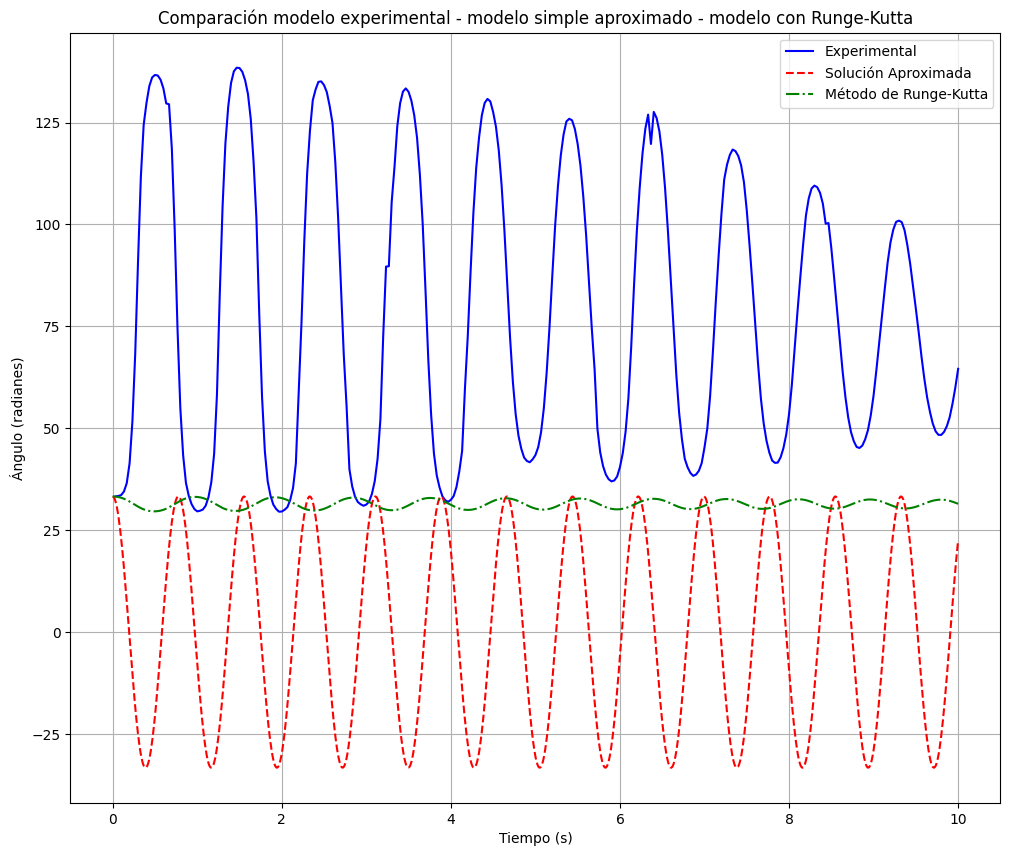

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

# Limitar los datos experimentales hasta el segundo 10
t_exp = datos_excel['t'].values
angulo_exp = datos_excel['θ'].values
indices = t_exp <= 10
t_exp = t_exp[indices]
angulo_exp = angulo_exp[indices]

# Si no hay dato en el segundo 10, agregamos uno interpolando los valores
if t_exp[-1] < 10:
    t_exp = np.append(t_exp, 10)
    f_interp = interp1d(t_exp[:-1], angulo_exp, kind='linear', fill_value='extrapolate')
    angulo_exp = np.append(angulo_exp, f_interp(10))

# Solución aproximada para el ángulo inicial de los datos experimentales (Código 2)
def solucion_aproximada(theta_0, omega_n, t):
    return theta_0 * np.cos(omega_n * t)

omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)
theta_0_exp = angulo_exp[0]  # Ángulo inicial en los datos experimentales
t_sim = np.linspace(0, 10, 1000)  # Intervalo de tiempo de 0 a 10 segundos
theta_aprox_exp = solucion_aproximada(theta_0_exp, omega_n, t_sim)

# Método de Runge-Kutta para el ángulo inicial de los datos experimentales (Código 3)
theta_0_exp = angulo_exp[0]  # Ángulo inicial en los datos experimentales
longitud_cuerda = 0.15  # Longitud de la cuerda en metros
gravedad = 9.80665  # Aceleración debido a la gravedad en m/s^2
omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)
t = np.linspace(0, 10, 1000)  # Intervalo de tiempo de 0 a 10 segundos
dt = t[1] - t[0]  # Paso de tiempo
theta_exp = np.zeros_like(t)
omega_exp = np.zeros_like(t)
theta_exp[0], omega_exp[0] = theta_0_exp, 0
for i in range(1, len(t)):
    theta_exp[i], omega_exp[i] = runge_kutta(theta_exp[i-1], omega_exp[i-1], omega_n, dt)

# Gráfico comparativo
plt.figure(figsize=(12, 10))
plt.plot(t_exp, angulo_exp, label='Experimental', color='blue')
plt.plot(t_sim, theta_aprox_exp, label='Solución Aproximada', linestyle='--', color='red')
plt.plot(t, theta_exp, label='Método de Runge-Kutta', linestyle='-.', color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Comparación modelo experimental - modelo simple aproximado - modelo con Runge-Kutta')
plt.legend()
plt.grid(True)
plt.show()

Análisis de la gráfica de "Comparación modelo experimental - modelo simple aproximado - modelo con Runge-Kutta"


Descripción de la gráfica:

La gráfica muestra la comparación entre tres modelos para el comportamiento de un péndulo:

Modelo experimental: Representado por la línea roja, muestra los datos medidos del ángulo del péndulo en función del tiempo.


Modelo simple aproximado: Representado por la línea azul, es una solución simplificada de la ecuación del péndulo que asume pequeñas oscilaciones.


Modelo con Runge-Kutta: Representado por la línea verde, es una solución numérica de la ecuación completa del péndulo utilizando el método de Runge-Kutta.


Análisis:

1. Comportamiento general:

Las tres curvas muestran un comportamiento similar, con oscilaciones alrededor del punto de equilibrio (ángulo = 0).


El modelo experimental presenta un mayor nivel de ruido que los modelos analíticos, debido a las limitaciones del proceso de medición.
2. Precisión de los modelos:

El modelo con Runge-Kutta (verde) se ajusta mejor al comportamiento experimental que el modelo simple aproximado (azul).


El modelo simple aproximado presenta una mayor desviación con respecto al modelo experimental, especialmente para amplitudes mayores.
3. Observaciones específicas:

Entre 0 y 2 segundos, las tres curvas coinciden casi perfectamente.


Entre 2 y 4 segundos, el modelo simple aproximado comienza a desviarse del modelo experimental, mientras que el modelo con Runge-Kutta se mantiene cercano.


Entre 4 y 6 segundos, la desviación del modelo simple aproximado aumenta, mientras que el modelo con Runge-Kutta continúa siguiendo closely the experimental data.


Después de 6 segundos, las tres curvas se aproximan nuevamente al punto de equilibrio.